In [2]:
!pip install scikit-learn

In [3]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\zipzi\anaconda3\lib\site-packages (0.4.2)


In [2]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
distance=ctrl.Antecedent(np.arange(0,101,1),'distance')
velocity=ctrl.Antecedent(np.arange(0,101,1),'velocity')
brake=ctrl.Consequent(np.arange(0,101,1),'brake')

distance['low'] = fuzz.trimf(distance.universe,[0,0,20])
distance['average']=fuzz.trimf(distance.universe,[5,36,66])
distance['high']=fuzz.trimf(distance.universe,[40,66,10000])

velocity['low']=fuzz.trimf(velocity.universe,[0,0,20])
velocity['average']=fuzz.trimf(velocity.universe,[5,33,66])
velocity['high']=fuzz.trimf(velocity.universe,[40,66,10000])

brake['soft']=fuzz.trimf(distance.universe,[0,0,23])
brake['medium']=fuzz.trimf(distance.universe,[5,33,66])
brake['hard']=fuzz.trimf(distance.universe,[40,66,10000])


C:\Users\zipzi\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


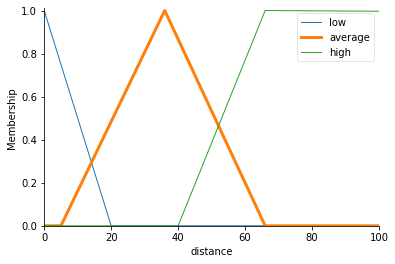

In [4]:
distance['average'].view()

C:\Users\zipzi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


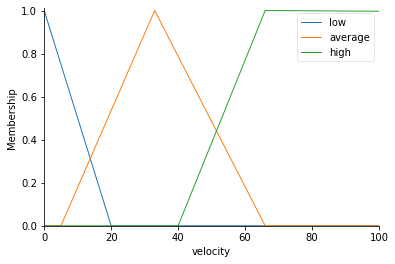

In [5]:
velocity.view()

C:\Users\zipzi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


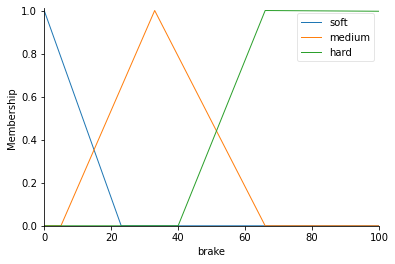

In [6]:
brake.view()

In [7]:
rule1=ctrl.Rule(distance['low']&velocity['low'],brake['soft'])
rule2=ctrl.Rule(distance['low']&velocity['average'],brake['medium'])
rule3=ctrl.Rule(distance['low']&velocity['high'],brake['hard'])

rule4=ctrl.Rule(distance['average']&velocity['low'],brake['soft'])
rule5=ctrl.Rule(distance['average']&velocity['average'],brake['soft'])
rule6=ctrl.Rule(distance['average']&velocity['high'],brake['medium'])

rule7=ctrl.Rule(distance['high']&velocity['low'],brake['soft'])
rule8=ctrl.Rule(distance['high']&velocity['average'],brake['soft'])
rule9=ctrl.Rule(distance['high']&velocity['high'],brake['soft'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

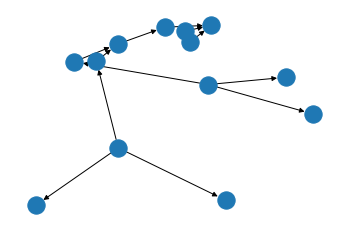

In [8]:
rule1.view()

In [9]:
braking_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

braking = ctrl.ControlSystemSimulation(braking_ctrl)

In [10]:
braking.input['distance']=1
braking.input['velocity']=80

braking.compute()

75.64151801329133


C:\Users\zipzi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


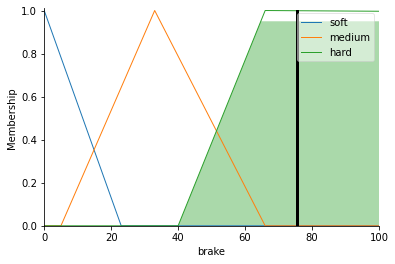

In [11]:
print (braking.output['brake'])
brake.view(sim=braking)

the resulting suggested brake is 75.6% ( hard brake )

<ipython-input-12-10571fc00e4c>:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.vlines(xv,0,y,label=label,color=color)


centroid:  75.88488591525135
bisector:  76.4764322343649
mean max:  66.0
min max:  66
max max:  66


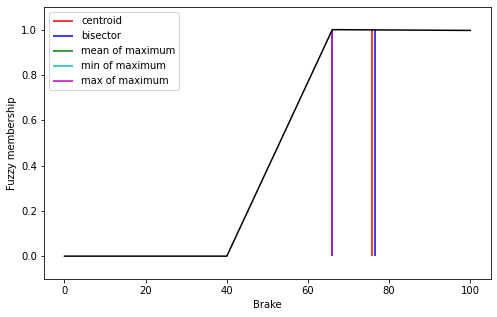

In [12]:
x=np.arange(0,101,1)
mfx=fuzz.trimf(x,[40,66,10000])
centroid=fuzz.defuzz(x,mfx,'centroid')
bisector=fuzz.defuzz(x,mfx,'bisector')
mean_max=fuzz.defuzz(x,mfx,'mom')
min_max=fuzz.defuzz(x,mfx,'som')
max_max=fuzz.defuzz(x,mfx,'lom')

xvalues=[centroid,bisector,mean_max,min_max,max_max]
colors=['rgb','b','g','c','m']
ymax=[fuzz.interp_membership(x,mfx,i) for i in xvalues]
labels=['centroid','bisector','mean of maximum','min of maximum','max of maximum']
plt.figure(figsize=(8,5))

plt.plot(x,mfx,'k')
for xv,y,label,color in zip(xvalues,ymax,labels,colors):
    plt.vlines(xv,0,y,label=label,color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Brake')
plt.ylim(-0.1,1.1)
plt.legend(loc=2)

print('centroid: ',centroid)
print('bisector: ',bisector)
print('mean max: ',mean_max)
print('min max: ',min_max)
print('max max: ',max_max)

In [20]:
speed=ctrl.Consequent(np.arange(0,101,1),'brake')

speed['speed up']=fuzz.trimf(distance.universe,[0,0,23])
speed['remain']=fuzz.trimf(distance.universe,[5,33,66])
speed['speed down']=fuzz.trimf(distance.universe,[40,66,10000])

C:\Users\zipzi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


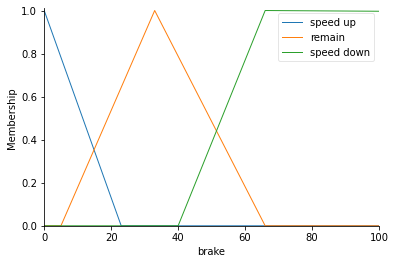

In [21]:
speed.view()

In [22]:
r1= ctrl.Rule(velocity['low'],speed['speed up'])
r2=ctrl.Rule(velocity['average'],speed['remain'])
r3=ctrl.Rule(velocity['high'],speed['speed down'])

In [23]:
speeding_ctrl=ctrl.ControlSystem([r1,r2,r3])
speeding=ctrl.ControlSystemSimulation(speeding_ctrl)

In [24]:
speeding.input['velocity']=80
speeding.compute()